In [1]:
import ee
import google.auth
from google.oauth2.service_account import Credentials

# Path to the service account JSON key file
service_account_key = "../ee-wri-lcl-zeno-2599d0871370.json"

# Specify the required OAuth scopes for Earth Engine
scopes = [
    "https://www.googleapis.com/auth/earthengine",
    "https://www.googleapis.com/auth/cloud-platform",
]

# Create credentials with the specified scopes
credentials = Credentials.from_service_account_file(service_account_key, scopes=scopes)

# Initialize Earth Engine with the service account credentials
ee.Initialize(credentials)

## Generating temporary tile urls using GEE

In [54]:
def get_url(image, band='b1', viz_params={}):
    selected_image = image.select(band) if band else image
    mid = selected_image.getMapId(viz_params)
    return mid['tile_fetcher'].url_format

In [12]:
## Instatiate image obj
image = ee.Image("WRI/SBTN/naturalLands/v1/2020")

## get info (sometimes this includes visualisation info)
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'classification',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1439601, 540001],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -179.9, 0, -0.00025, 75]},
  {'id': 'natural',
   'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 1},
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -179.9, 0, -0.00025, 75]}],
 'version': 1725397479424399,
 'id': 'WRI/SBTN/naturalLands/v1/2020',
 'properties': {'system:time_start': 1577836800000,
  'classification_class_values': [2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21],
  'natural_class_values': [0, 1],
  'system:footprint': {'type': 'LinearRing',
   'coordinates': [[-180, -90],
    [180, -90],
    [180, 90],
    [-180, 90],
    [-180, -90]]},
  'system:time_end': 1609459200000,
  'natural_class_palette': ['969696', 'A8DDB5'],
  '

In [19]:
## define viz params
band = "classification"
viz_params = {
    "min": 2,
    "max": 21,
    "palette": [
        '246E24',
        'B9B91E',
        '6BAED6',
        '06A285',
        'FEFECC',
        'ACD1E8',
        '589558',
        '093D09',
        'DBDB7B',
        '99991A',
        'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3'
    ],
}

url = get_url(image, band, viz_params)
url

'https://earthengine.googleapis.com/v1/projects/earthengine-legacy/maps/57c9739e7f6e1b5b3e2437fa983d9dc7-758ad6720b933b18744d961d6a9b5a80/tiles/{z}/{x}/{y}'

In [25]:
tile_url = url.replace('{z}/{x}/{y}', '8/78/143')
tile_url

'https://earthengine.googleapis.com/v1/projects/earthengine-legacy/maps/57c9739e7f6e1b5b3e2437fa983d9dc7-758ad6720b933b18744d961d6a9b5a80/tiles/8/78/143'

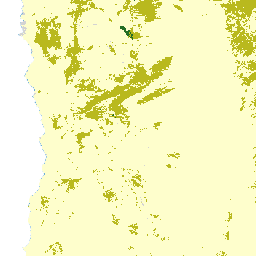

In [26]:
from IPython.display import Image
Image(url=tile_url, embed=True, format='png')

In [27]:
## define viz params
band = "natural"
viz_params = {
    "min": 0,
    "max": 1,
    "palette": ['969696', 'A8DDB5'],
}

url = get_url(image, band, viz_params)
url

'https://earthengine.googleapis.com/v1/projects/earthengine-legacy/maps/9ac35ac5573d594a7ecf512f2b5eeabd-fbe15d09b0cac8e9b85430f327ea36c0/tiles/{z}/{x}/{y}'

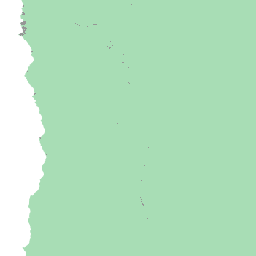

In [29]:
tile_url = url.replace('{z}/{x}/{y}', '8/78/143')
Image(url=tile_url, embed=True, format='png')

## Land Cover 2020

In [39]:
image = ee.Image("projects/glad/GLCLU2020/v2/LCLUC_2020")
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'b1',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 560000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]}],
 'version': 1694471792005900.0,
 'id': 'projects/glad/GLCLU2020/v2/LCLUC_2020',
 'properties': {'system:footprint': {'type': 'LinearRing',
   'coordinates': [[-180, -90],
    [180, -90],
    [180, 90],
    [-180, 90],
    [-180, -90]]},
  'system:asset_size': 69823746933}}

In [40]:
## define viz params
band = "b1"
viz_params = {"min":0,"max":255,"palette":["FEFECC","FAFAC3","F7F7BB","F4F4B3","F1F1AB","EDEDA2","EAEA9A","E7E792","E4E48A",
"E0E081","DDDD79","DADA71","D7D769","D3D360","D0D058","CDCD50","CACA48","C6C63F","C3C337","C0C02F","BDBD27","B9B91E","B6B616",
"B3B30E","B0B006","609C60","5C985C","589558","549254","508E50","4C8B4C","488848","448544","408140","3C7E3C","387B38","347834",
"317431","2D712D","296E29","256B25","216721","1D641D","196119","155E15","115A11","0D570D","095409","065106","643700","643a00",
"643d00","644000","644300","644600","644900","654c00","654f00","655200","655500","655800","655a00","655d00","656000","656300",
"666600","666900","666c00","666f00","667200","667500","667800","667b00","ff99ff","FC92FC","F98BF9","F685F6","F37EF3","F077F0",
"ED71ED","EA6AEA","E763E7","E45DE4","E156E1","DE4FDE","DB49DB","D842D8","D53BD5","D235D2","CF2ECF","CC27CC","C921C9","C61AC6",
"C313C3","C00DC0","BD06BD","bb00bb","000003","000004","000005","BFC0C0","B7BDC2","AFBBC4","A8B8C6","A0B6C9","99B3CB","91B1CD",
"89AFD0","82ACD2","7AAAD4","73A7D6","6BA5D9","64A3DB","5CA0DD","549EE0","4D9BE2","4599E4","3E96E6","3694E9","2E92EB","278FED",
"1F8DF0","188AF2","1088F4","0986F7","55A5A5","53A1A2","519E9F","4F9B9C","4D989A","4B9597","499294","478F91","458B8F","43888C",
"418589","3F8286","3D7F84","3B7C81","39797E","37767B","357279","336F76","316C73","2F6970","2D666E","2B636B","296068","285D66",
"bb93b0","B78FAC","B48CA9","B189A6","AE85A2","AA829F","A77F9C","A47B99","A17895","9E7592","9A718F","976E8C","946B88","916885",
"8D6482","8A617F","875E7B","845A78","815775","7D5472","7A506E","774D6B","744A68","714765","de7cbb","DA77B7","D772B3","D46EAF",
"D169AB","CE64A8","CB60A4","C85BA0","C4579C","C15298","BE4D95","BB4991","B8448D","B54089","B23B86","AF3682","AB327E","A82D7A",
"A52976","A22473","9F1F6F","9C1B6B","991667","961264","000000","000000","000000",
"1964EB","1555E4","1147DD","0E39D6","0A2ACF","071CC8","030EC1","0000BA",
"0000BA","040464","0000FF","3051cf","000000","000000","000000","000000",
"000000","000000","000000","000000","000000","000000","000000","000000",
"000000","000000","000000","000000","000000","000000","000000","000000",
"547FC4","4D77BA","466FB1","4067A7","395F9E","335895","335896","335897","ff2828","ffffff","d0ffff","ffe0d0","ff7d00","fac800","c86400",
"fff000","afcd96","afcd96","64dcdc","00ffff","00ffff","00ffff","111133","000000"]}

url = get_url(image, band, viz_params)
url

'https://earthengine.googleapis.com/v1/projects/earthengine-legacy/maps/580bd9acc2f500d565829d4fc29cb7e3-edcd24d9f8dbaa4f64bdb4b498baf692/tiles/{z}/{x}/{y}'

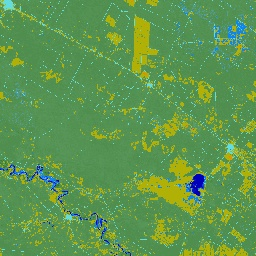

In [41]:
tile_url = url.replace('{z}/{x}/{y}', '9/168/291')
Image(url=tile_url, embed=True, format='png')

## Dominant Grasslands 2022

In [42]:
image = ee.Image("projects/global-pasture-watch/assets/ggc-30m/v1/grassland_c/2022")
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'dominant_class',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1436000, 528000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.0002499999999999676,
    0,
    -180,
    0,
    -0.0002499999999999676,
    76]}],
 'version': 1728588528278964,
 'id': 'projects/global-pasture-watch/assets/ggc-30m/v1/grassland_c/2022',
 'properties': {'system:time_start': 1640995200000,
  'system:footprint': {'type': 'LinearRing',
   'coordinates': [[36.13620481797695, 76.00012545508356],
    [-31.70212663560705, 76.00012548045406],
    [-125.65909268944382, 76.00012546048005],
    [179.9990898386791, 76.00012504906192],
    [179.99967717309065, -56.00012509362095],
    [-136.7025418063928, -56.000125432397105],
    [-100.06633693134253, -56.00012547614944],
    [-43.97262606682938, -56.000125449556],
    [-5.408199668238945, -56.000125433999116],
    [36.48679062986134, -56.000125445898554],
    [64.358353

In [43]:
## define viz params
band = "dominant_class"
viz_params = {
    "min":0,
    "max":2,
    "palette":["ffffff", "ff9916", "ffcd73"]
}

url = get_url(image, band, viz_params)
url

'https://earthengine.googleapis.com/v1/projects/earthengine-legacy/maps/a2d18892780fffb34b1c63f98f7fce97-9de08a2678cbeb9d36b732520fa2adc6/tiles/{z}/{x}/{y}'

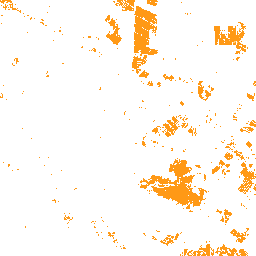

In [44]:
tile_url = url.replace('{z}/{x}/{y}', '9/168/291')
Image(url=tile_url, embed=True, format='png')

## Forest type

In [59]:
image = ee.ImageCollection("JRC/GFC2020_subtypes/V0").mosaic()
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'Map',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [62]:
## define viz params
band = None
viz_params = {
    "min":0,
    "max":20,
    "palette": ["ffffff",
                "78c679",
                "00000000", "00000000", "00000000", "00000000", "00000000", "00000000", "00000000", "00000000", 
                "006837",
                "00000000", "00000000", "00000000", "00000000", "00000000", "00000000", "00000000", "00000000", "00000000",
                "cc6600"
    ]
}

url = get_url(image, band, viz_params)
url

'https://earthengine.googleapis.com/v1/projects/earthengine-legacy/maps/871ab6d21ac87dab4b0329dca66187e0-a637e52ae36fc3462fdc37bad623787a/tiles/{z}/{x}/{y}'

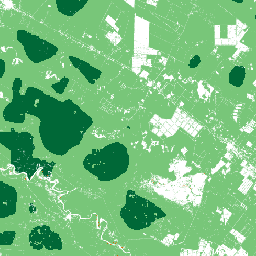

In [63]:
tile_url = url.replace('{z}/{x}/{y}', '9/168/291')
Image(url=tile_url, embed=True, format='png')

## Tree canopy height

In [64]:
image = ee.ImageCollection("projects/meta-forest-monitoring-okw37/assets/CanopyHeight").mosaic()
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'cover_code',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [65]:
## define viz params
band = None
viz_params = {
    "min":0,
    "max":25,
    "palette": ['f7fcf5', 'f1faee', 'ecf8e8', 'e6f5e1', 'ddf2d8', 'd3eecd',
    'caeac3', 'bee5b8', 'b2e0ac', 'a5db9f', '98d594', '8ace88',
    '7cc87c', '6bc072', '5bb86a', '4bb062', '3ea75a', '339c52',
    '2a924a', '208843', '157f3b', '097532', '006b2b', '005e26',
    '005120', '00441b'
    ]
}

url = get_url(image, band, viz_params)
url

'https://earthengine.googleapis.com/v1/projects/earthengine-legacy/maps/645a96325b003098c33291a38732e151-0252cae0983f50a8c85c99adb3994d77/tiles/{z}/{x}/{y}'

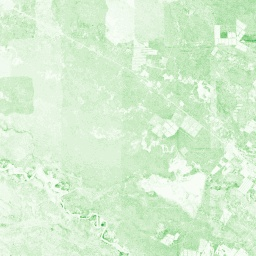

In [66]:
tile_url = url.replace('{z}/{x}/{y}', '9/168/291')
Image(url=tile_url, embed=True, format='png')